## BHH approximation without fixed points

### Uniform distribution

100%|██████████| 100/100 [00:00<00:00, 24323.27it/s]

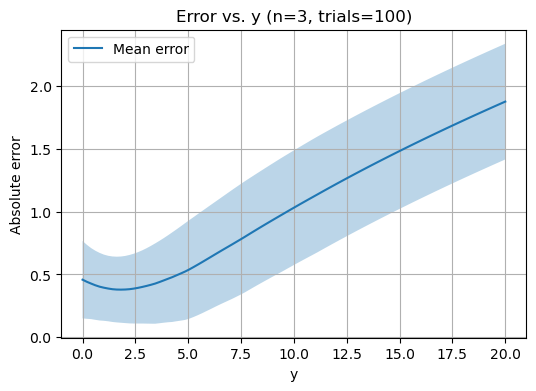

For n=3 Optimal mean error: 0.3790 at y = 1.82


100%|██████████| 100/100 [00:00<00:00, 7241.67it/s]


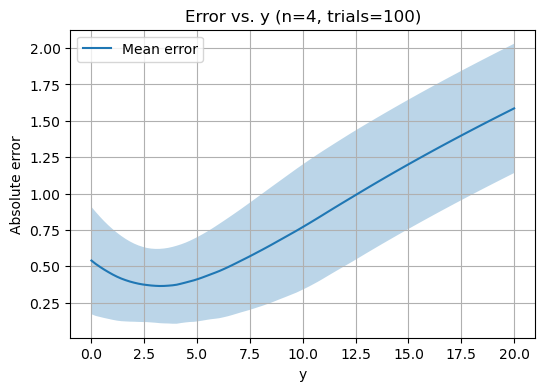

For n=4 Optimal mean error: 0.3640 at y = 3.23


100%|██████████| 100/100 [00:00<00:00, 12371.85it/s]

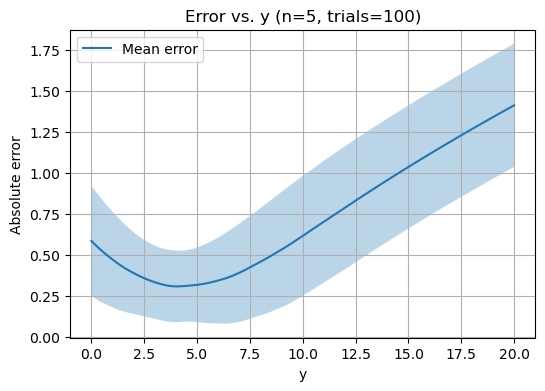

For n=5 Optimal mean error: 0.3058 at y = 4.04


100%|██████████| 100/100 [00:00<00:00, 6287.65it/s]


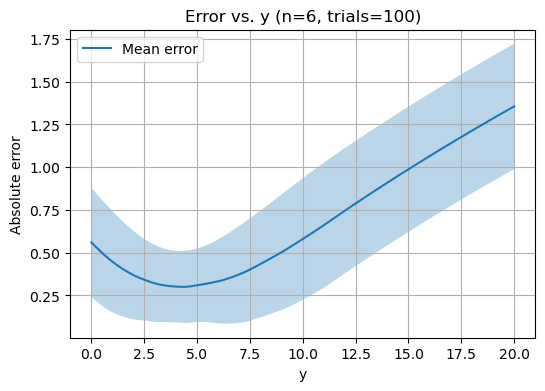

For n=6 Optimal mean error: 0.3005 at y = 4.44


100%|██████████| 100/100 [00:00<00:00, 2902.67it/s]

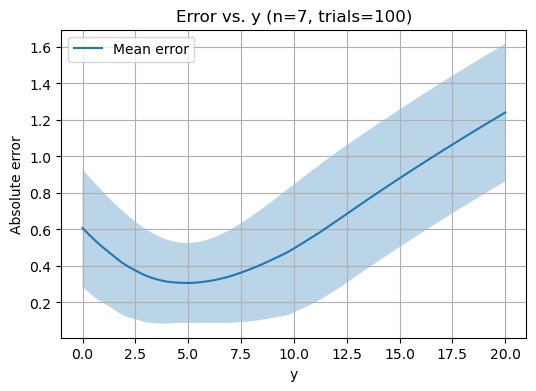

For n=7 Optimal mean error: 0.3067 at y = 5.05


100%|██████████| 100/100 [00:00<00:00, 1117.30it/s]

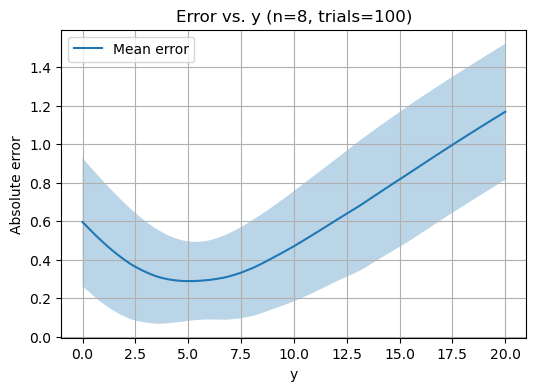

For n=8 Optimal mean error: 0.2886 at y = 5.05


100%|██████████| 100/100 [00:00<00:00, 329.14it/s]

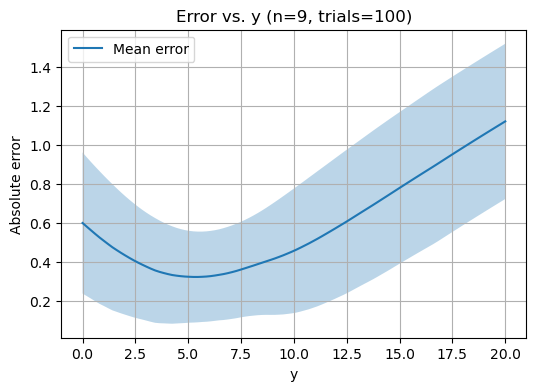

For n=9 Optimal mean error: 0.3233 at y = 5.45


100%|██████████| 100/100 [00:00<00:00, 121.07it/s]


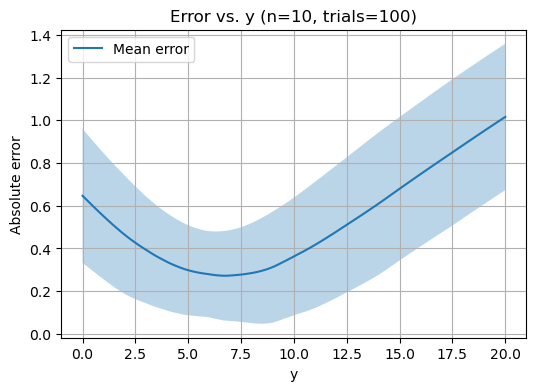

For n=10 Optimal mean error: 0.2723 at y = 6.67


100%|██████████| 100/100 [00:02<00:00, 48.37it/s]

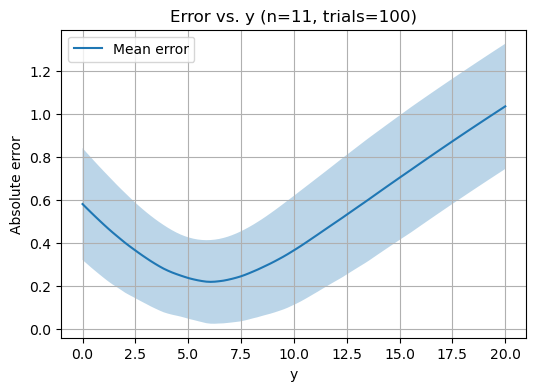

For n=11 Optimal mean error: 0.2178 at y = 6.06


100%|██████████| 100/100 [00:04<00:00, 20.29it/s]

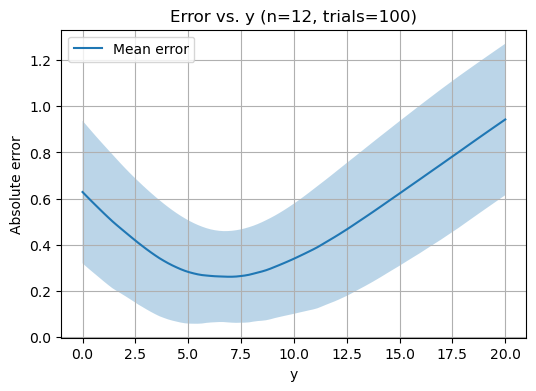

For n=12 Optimal mean error: 0.2618 at y = 6.87


100%|██████████| 100/100 [00:11<00:00,  8.41it/s]

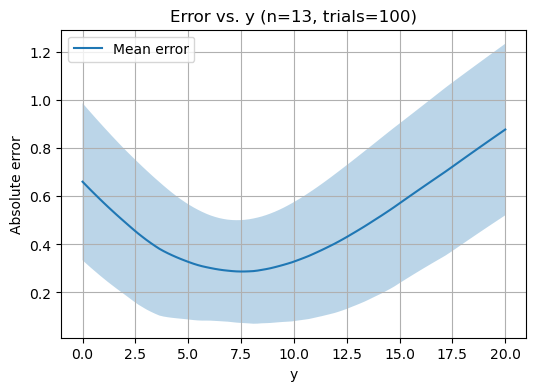

For n=13 Optimal mean error: 0.2871 at y = 7.47


100%|██████████| 100/100 [00:28<00:00,  3.52it/s]

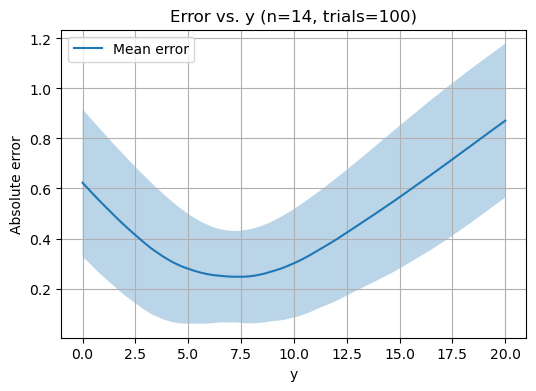

For n=14 Optimal mean error: 0.2471 at y = 7.47


100%|██████████| 100/100 [01:07<00:00,  1.49it/s]

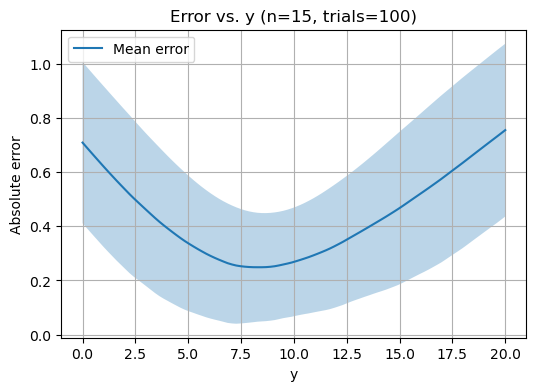

For n=15 Optimal mean error: 0.2486 at y = 8.48


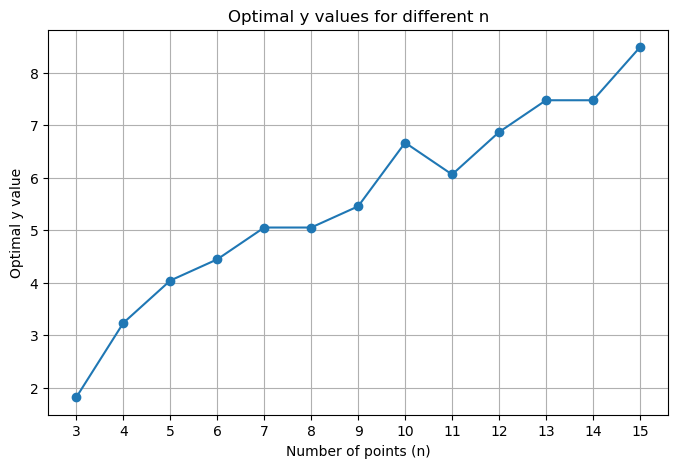

In [2]:
import numpy as np
import math
from tqdm import tqdm
from scipy.spatial.distance import pdist, squareform
from python_tsp.exact import solve_tsp_dynamic_programming
import matplotlib.pyplot as plt

# Parameters
beta = 0.7120
side_length = 1
I = side_length**2
num_trials = 100
optimal_y_values = []
n_values = range(3, 16)
for n in n_values:
    y_values = np.linspace(0, 20, 100)
    # Collect errors
    errors = np.zeros((num_trials, len(y_values)))

    for t in tqdm(range(num_trials)):
        points = np.random.rand(n, 2) * side_length
        D = squareform(pdist(points))
        _, L_n = solve_tsp_dynamic_programming(D)
        errors[t] = np.abs(L_n - beta * np.sqrt(n + y_values) * I)

    mean_errors = errors.mean(axis=0)
    std_errors = errors.std(axis=0)

    optimal_mean_error = mean_errors.min()
    optimal_y_value = y_values[np.argmin(mean_errors)]
    optimal_y_values.append(optimal_y_value)

    print("=" * 50)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(y_values, mean_errors, label='Mean error')
    plt.fill_between(y_values, mean_errors - std_errors, mean_errors + std_errors, alpha=0.3)
    plt.xlabel('y')
    plt.ylabel('Absolute error')
    plt.title(f'Error vs. y (n={n}, trials={num_trials})')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"For n={n} Optimal mean error: {optimal_mean_error:.4f} at y = {optimal_y_value:.2f}")

# Print optimal y values for each n
fig = plt.figure(figsize=(8, 5))
plt.plot(n_values, optimal_y_values, marker='o')
plt.xlabel('Number of points (n)')
plt.ylabel('Optimal y value')
plt.title('Optimal y values for different n')
plt.grid(True)
plt.xticks(n_values)
plt.show()


Linear regression coefficients: 0.4718 (slope), 1.3020 (intercept)
Hypothesis test for slope: p-value = 0.0000, slope = 0.4718, intercept = 1.3020


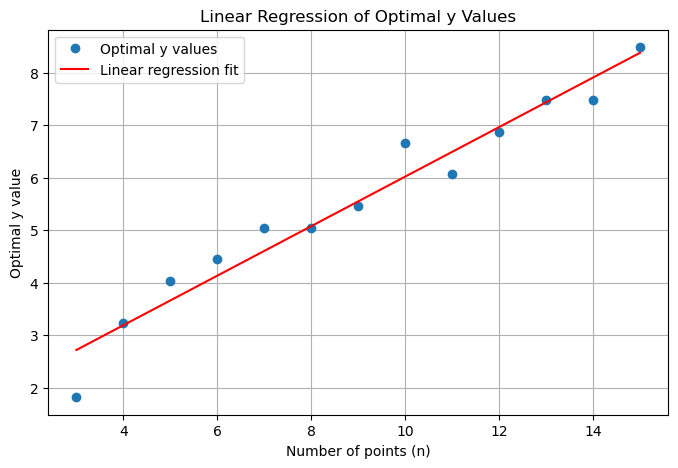

In [3]:
# Linear regression to find the relationship between n and optimal y
from sklearn.linear_model import LinearRegression
X = np.array(n_values).reshape(-1, 1)
y = np.array(optimal_y_values).reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
# Print the coefficients of the linear regression
print(f"Linear regression coefficients: {model.coef_[0][0]:.4f} (slope), {model.intercept_[0]:.4f} (intercept)")
# Hypothesis test for the slope
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y.flatten())
print(f"Hypothesis test for slope: p-value = {p_value:.4f}, slope = {slope:.4f}, intercept = {intercept:.4f}")
# Print the linear regression line
y_fit = model.predict(X)
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'o', label='Optimal y values')
plt.plot(X, y_fit, 'r-', label='Linear regression fit')
plt.xlabel('Number of points (n)')
plt.ylabel('Optimal y value')
plt.title('Linear Regression of Optimal y Values')
plt.legend()
plt.grid(True)
plt.show()

### Test whether the constant $C$ depends on the distribution

     density         I  Estimated C    Std(C)
0    uniform  1.000000     0.688712  0.338928
1  beta(2,5)  0.698117     0.088107  0.305984
2   gaussian  0.501325    -0.076014  0.207194


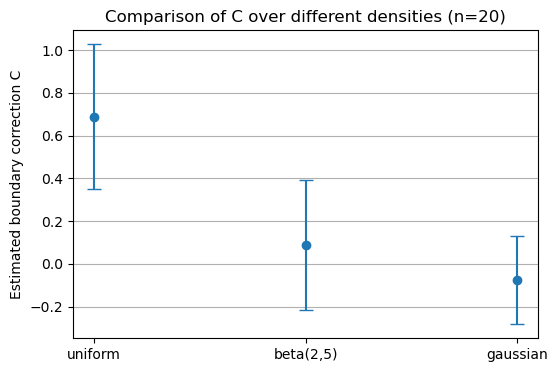

In [17]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.stats import beta as beta_dist, multivariate_normal
from python_tsp.exact import solve_tsp_dynamic_programming
from python_tsp.heuristics import solve_tsp_simulated_annealing
import matplotlib.pyplot as plt

# ---- 1) Define the candidate distributions ----
def sample_uniform(n):
    """Uniform on [0,1]^2."""
    return np.random.rand(n, 2)

def pdf_uniform(xy):
    return 1.0  # density = 1 on the unit square

def sample_beta(n):
    """Independent Beta(2,5) on each coordinate."""
    return beta_dist(a=2, b=5).rvs(size=(n, 2))

def pdf_beta(xy):
    # product of Beta(2,5) pdfs
    return beta_dist(a=2, b=5).pdf(xy[:,0]) * beta_dist(a=2, b=5).pdf(xy[:,1])

def sample_gauss(n):
    """Truncated bivariate Normal (mean 0.5, cov=0.1^2 I) on [0,1]^2."""
    pts = np.random.randn(n,2) * 0.1 + 0.5
    return np.clip(pts, 0, 1)  # hard truncate

# un-normalized Gaussian pdf on R^2; we don’t re-normalize since we only need √f up to constant
gauss_pdf_unnorm = multivariate_normal(mean=[0.5,0.5], cov=np.eye(2)*0.1**2).pdf

# pack into a dict
distributions = {
    "uniform":   (sample_uniform, pdf_uniform, 1.0),
    "beta(2,5)": (sample_beta,    pdf_beta,    None),
    "gaussian":  (sample_gauss,   gauss_pdf_unnorm, None),
}

# ---- 2) Precompute I = ∫_S √f(x) dx for each density ----
#    For uniform: ∫√1 dx = 1
#    For beta and gaussian: estimate by Monte Carlo
I_vals = {}
MC = 200_000
# uniform
I_vals["uniform"] = 1.0
# beta
xy = np.random.rand(MC,2)
I_vals["beta(2,5)"] = np.mean(np.sqrt(pdf_beta(xy)))
# gaussian (note: truncated, so approximate ∫ √f_unnorm dx over [0,1]^2)
I_vals["gaussian"] = np.mean(np.sqrt(gauss_pdf_unnorm(xy)))

# ---- 3) Estimate C for each density ----
beta_const = 0.712
n_small    = 20
m_trials   = 500

results = []
for name, (sampler, pdf, _) in distributions.items():
    I = I_vals[name]
    diffs = np.zeros(m_trials)
    for t in range(m_trials):
        pts = sampler(n_small)
        D   = squareform(pdist(pts))
        _, L_n = solve_tsp_simulated_annealing(D)
        # boundary correction: L_n - beta * sqrt(n) * I
        diffs[t] = L_n - beta_const * np.sqrt(n_small) * I
    C_est = diffs.mean()
    results.append({
        "density": name,
        "I": I,
        "Estimated C": C_est,
        "Std(C)": diffs.std()
    })

df = pd.DataFrame(results)
print(df)

# ---- 4) Plotting ----
plt.figure(figsize=(6,4))
plt.errorbar(df["density"], df["Estimated C"], yerr=df["Std(C)"],
             fmt='o', capsize=5)
plt.ylabel("Estimated boundary correction C")
plt.title(f"Comparison of C over different densities (n={n_small})")
plt.grid(True, axis='y')
plt.show()


### So clearly the constant $C$ depends on the distribution, though it does not depend on $n$

### Estimate the constant $C$ using small-scale problem then estimate larger problem

    n  Estimated C
0  10     0.192678
1  15     0.184348
2  20     0.176873
3  25     0.148245
4  30     0.146363
5  35     0.140054
6  40     0.129989
7  45     0.129267
8  50     0.123189


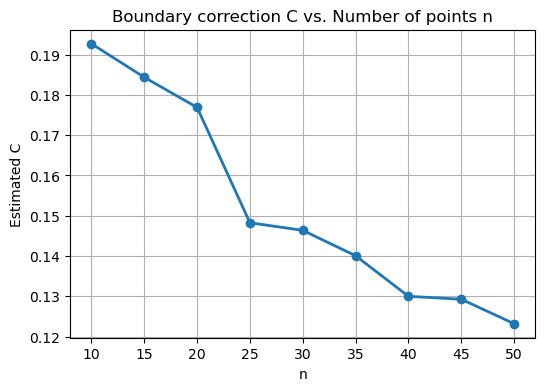

In [4]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from python_tsp.exact import solve_tsp_branch_and_bound
from python_tsp.heuristics import solve_tsp_simulated_annealing

# Parameters
beta     = 0.712             # BHH constant
L        = 1.0               # side length of [0, L]^2
I        = L                 # ∫√f over [0,L]^2 for f=uniform
n_values = [10, 15, 20, 25, 30, 35, 40, 45, 50]  # different n to test
m_trials = 100               # Monte Carlo trials per n

# Estimate C for each n
results = []
for n in n_values:
    diffs = []
    for _ in range(m_trials):
        pts = np.random.rand(n, 2) * L
        D   = squareform(pdist(pts))
        _, L_n = solve_tsp_simulated_annealing(D)
        diffs.append(L_n - beta * np.sqrt(n) * I)
    C_est = np.mean(diffs) / np.sqrt(n)
    results.append({"n": n, "Estimated C": C_est})

# Tabulate
df = pd.DataFrame(results)
print(df)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df["n"], df["Estimated C"], 'o-', linewidth=2)
plt.xlabel("n")
plt.ylabel("Estimated C")
plt.title("Boundary correction C vs. Number of points n")
plt.grid(True)
plt.show()


In [5]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from python_tsp.exact import solve_tsp_dynamic_programming, solve_tsp_branch_and_bound

# 1) Parameters
beta       = 0.712             # BHH constant
n_small    = 10                # small-scale problem size
L_small    = 1.0               # small-scale region side length
m_trials   = 100               # Monte Carlo trials for C
n_large    = 50                # larger problem size
L_large    = 1.0               # larger region side length
I_small    = L_small           # integral of sqrt(f) over [0,L]^2 for uniform f=1/L^2
I_large    = L_large

# 2) Estimate C on small scale
diffs = np.zeros(m_trials)
for t in range(m_trials):
    pts = np.random.rand(n_small,2)*L_small
    D   = squareform(pdist(pts))
    if n_small < 15:
        _, L_n = solve_tsp_branch_and_bound(D)
    else:
        _, L_n = solve_tsp_simulated_annealing(D)
    diffs[t] = (L_n - beta * np.sqrt(n_small) * I_small) / np.sqrt(n_small)
C_est = diffs.mean()

# 3) Compute shift function y(n)
def y_shift(n, I, beta, C):
    return (2*C/(beta*I))*n + (C**2/(beta**2 * I**2)) * n

y_large = y_shift(n_large, I_large, beta, C_est)

# 4) Actual vs approximate on large scale
pts = np.random.rand(n_large,2)*L_large
D   = squareform(pdist(pts))
if n_large < 15:
    _, L_n_large = solve_tsp_branch_and_bound(D)
else:
    _, L_n_large = solve_tsp_simulated_annealing(D)

approx_no_shift  = beta * np.sqrt(n_large) * I_large
approx_with_shift= beta * np.sqrt(n_large + y_large) * I_large

error_no_shift    = abs(L_n_large - approx_no_shift)
error_with_shift  = abs(L_n_large - approx_with_shift)

print(f"Estimated C       = {C_est:.4f}")
print(f"Large n={n_large}, L={L_large}")
print(f"  Actual L_n      = {L_n_large:.4f}")
print(f"  Error w/o shift = {error_no_shift:.4f}")
print(f"  Error w/ shift  = {error_with_shift:.4f}")


Estimated C       = 0.1914
Large n=50, L=1.0
  Actual L_n      = 6.0510
  Error w/o shift = 1.0164
  Error w/ shift  = 0.3372


## BHH approximation with fixed points

### Single fixed point with uniform distribution

In [8]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.spatial.distance import pdist, squareform
from python_tsp.exact import solve_tsp_dynamic_programming, solve_tsp_branch_and_bound

beta = 0.7120
I = 1.0
y = 2 / (beta) + 1 / (beta**2 * n)

ns      = [5, 6, 7, 8, 9, 10, 11, 12, 15, 20]
trials  = 100
x0      = np.array([[0.1, 0.8]])


# 2) Estimate C on small scale
n_small = 10
L_small = 1.0
I_small = L_small
m_trials = 100

diffs = np.zeros(m_trials)
for t in range(m_trials):
    pts = np.random.rand(n_small, 2)*L_small
    D   = squareform(pdist(pts))
    if n_small < 15:
        _, L_n = solve_tsp_branch_and_bound(D)
    else:
        _, L_n = solve_tsp_simulated_annealing(D)
    diffs[t] = (L_n - beta * np.sqrt(n_small) * I_small) / np.sqrt(n_small)
C_est = diffs.mean()


records = []
for n in tqdm(ns):
    errs0 = []
    errs1 = []
    errs2 = []
    mean_length = []
    for _ in range(trials):
        rnd_pts = np.random.rand(n, 2)
        pts     = np.vstack((x0, rnd_pts))
        D = squareform(pdist(pts, metric='euclidean'))
        
        if n < 15:
            perm, L = solve_tsp_branch_and_bound(D)
        else:
            perm, L = solve_tsp_simulated_annealing(D)
        mean_length.append(L)
        
        approx0 = beta * np.sqrt(n)        * I
        approx1 = beta * np.sqrt(n + y)    * I
        approx2 = beta * np.sqrt(n + y)    * I + np.sqrt(n) * C_est
        errs0.append(abs(L - approx0))
        errs1.append(abs(L - approx1))
        errs2.append(abs(L - approx2))
    
    records.append({
        'n'                 : n,
        'mean_length'       : np.mean(mean_length),
        'mean_err_no_shift' : np.mean(errs0),
        'std_err_no_shift'  : np.std(errs0),
        'mean_err_shift'    : np.mean(errs1),
        'std_err_shift'     : np.std(errs1),
        'mean_err_shift_C'  : np.mean(errs2),
        'std_err_shift_C'   : np.std(errs2)
    })

df = pd.DataFrame(records)
print(df.to_string(index=False))


100%|██████████| 10/10 [01:50<00:00, 11.06s/it]

 n  mean_length  mean_err_no_shift  std_err_no_shift  mean_err_shift  std_err_shift  mean_err_shift_C  std_err_shift_C
 5     2.400092           0.812896          0.316028        0.440299       0.268816          0.261617         0.199503
 6     2.530073           0.786036          0.289715        0.426264       0.257507          0.226566         0.180717
 7     2.636510           0.756771          0.323157        0.431462       0.284072          0.264186         0.207962
 8     2.784893           0.771052          0.309710        0.453003       0.280246          0.246497         0.192372
 9     2.872933           0.739746          0.299321        0.439204       0.271857          0.251827         0.195697
10     3.062241           0.813938          0.343721        0.543699       0.286429          0.270118         0.226377
11     3.139726           0.778289          0.309520        0.500882       0.282190          0.260601         0.182715
12     3.182345           0.719699          0.28

In [9]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.spatial.distance import pdist, squareform
from python_tsp.exact import solve_tsp_dynamic_programming

# BHH constant and I
beta = 0.7120
I = 1.0

# sample sizes and trials
ns     = [5, 6, 7, 8, 9, 10, 11]
trials = 100
x0     = np.array([[0.5, 0.5]])

# range of y‐values to test
y_values = np.linspace(0, 10, 100)   # e.g. from 0 to 3 in steps of 0.1

records = []
for y in tqdm(y_values):
    for n in ns:
        errs = []
        for _ in range(trials):
            # sample n random points
            rnd_pts = np.random.rand(n, 2)
            pts     = np.vstack((x0, rnd_pts))

            # compute exact TSP length
            D = squareform(pdist(pts, metric='euclidean'))
            perm, L = solve_tsp_dynamic_programming(D)

            # shifted BHH approximation
            approx = beta * np.sqrt(n + y) * I
            errs.append(abs(L - approx))

        records.append({
            'y': y,
            'n': n,
            'mean_error': np.mean(errs),
            'std_error' : np.std(errs),
        })

df = pd.DataFrame(records)

# pivot so you can see mean_error for each (y, n)
mean_err_df = df.pivot(index='y', columns='n', values='mean_error')
print(mean_err_df.to_string(index=True))


100%|██████████| 100/100 [17:47<00:00, 10.68s/it]

n                5         6         7         8         9         10        11
y                                                                              
0.000000   0.633648  0.649104  0.685489  0.692152  0.688562  0.733782  0.739794
0.101010   0.586876  0.608840  0.671510  0.703335  0.687308  0.736642  0.697176
0.202020   0.590343  0.589102  0.700283  0.675240  0.706802  0.752971  0.709319
0.303030   0.555045  0.626178  0.642057  0.666704  0.705684  0.695123  0.693751
0.404040   0.570886  0.598081  0.608413  0.656672  0.688911  0.648780  0.693674
0.505051   0.483690  0.557372  0.630293  0.607188  0.709610  0.677746  0.685948
0.606061   0.557116  0.571396  0.537390  0.598855  0.665828  0.633578  0.688459
0.707071   0.519140  0.534472  0.552890  0.649341  0.643547  0.622092  0.649253
0.808081   0.463390  0.572081  0.573382  0.562223  0.586004  0.585183  0.601149
0.909091   0.549366  0.594678  0.550948  0.631184  0.629161  0.608283  0.671032
1.010101   0.504234  0.549279  0.637910 

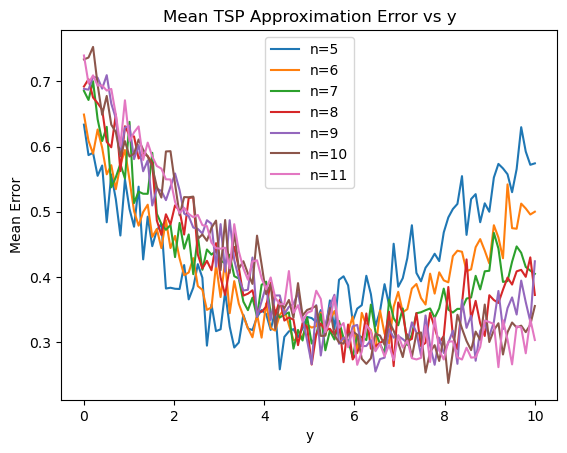

In [10]:
import matplotlib.pyplot as plt

# Assuming `mean_err_df` is already defined from the previous code
plt.figure()
for n in mean_err_df.columns:
    plt.plot(mean_err_df.index, mean_err_df[n], label=f'n={n}')
plt.xlabel('y')
plt.ylabel('Mean Error')
plt.title('Mean TSP Approximation Error vs y')
plt.legend()
plt.show()


### Multiple fixed points with truncated Gaussian distribution

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist, squareform
from python_tsp.exact import solve_tsp_dynamic_programming

# 1) Truncated Gaussian on [0,1]^2
mean = np.array([0.5, 0.5])
cov = np.eye(2) * 0.2**2
mvnorm = multivariate_normal(mean=mean, cov=cov)

# Monte Carlo estimate of normalization Z and I
N_MC = 200_000
uniform_pts = np.random.rand(N_MC, 2)
phis = mvnorm.pdf(uniform_pts)
Z_hat = phis.mean()                # ≈ ∫ φ(x) dx over the unit square
f_hat = phis / Z_hat               # truncated‐Gaussian PDF
I_hat = np.mean(np.sqrt(f_hat))    # ≈ ∫ sqrt(f) dx

# 3 fixed points
fixed_points = np.array([[0.25,0.25],[0.50,0.50],[0.75,0.75]])
m = len(fixed_points)

beta = 0.7120
f_fixed = mvnorm.pdf(fixed_points) / Z_hat
y_j = 2 / (beta * I_hat * np.sqrt(f_fixed))
y_total = y_j.mean()

ns = [5, 6, 7, 8, 10, 12, 13]
trials = 100

results = []
for n in ns:
    errs0 = []
    errs1 = []
    for _ in range(trials):
        # sample n points via rejection
        pts = []
        while len(pts) < n:
            cand = mvnorm.rvs(size=n)
            cand = cand[(cand[:,0]>=0)&(cand[:,0]<=1)&(cand[:,1]>=0)&(cand[:,1]<=1)]
            pts.append(cand)
        rnd_pts = np.vstack(pts)[:n]
        
        all_pts = np.vstack((fixed_points, rnd_pts))
        D = squareform(pdist(all_pts, metric='euclidean'))
        perm, L_exact = solve_tsp_dynamic_programming(D)
        
        approx0 = beta * np.sqrt(n)         * I_hat
        approx1 = beta * np.sqrt(n + y_total) * I_hat
        
        errs0.append(L_exact - approx0)
        errs1.append(L_exact - approx1)
    
    results.append({
        'n'                   : n,
        'mean_err_no_shift'   : np.mean(errs0),
        'std_err_no_shift'    : np.std(errs0),
        'mean_err_with_shift' : np.mean(errs1),
        'std_err_with_shift'  : np.std(errs1),
    })

df = pd.DataFrame(results)
print(df.to_string(index=False))


 n  mean_err_no_shift  std_err_no_shift  mean_err_with_shift  std_err_with_shift
 5           0.553834          0.238374             0.202101            0.238374
 6           0.538806          0.286236             0.212093            0.286236
 7           0.491531          0.265358             0.185111            0.265358
 8           0.401035          0.262256             0.111514            0.262256
10           0.358906          0.280284             0.096155            0.280284
12           0.406106          0.276665             0.163825            0.276665
13           0.368750          0.256708             0.135054            0.256708


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist, squareform
from python_tsp.exact import solve_tsp_dynamic_programming

# 1) Truncated Gaussian on [0,1]^2
mean = np.array([0.5, 0.5])
cov = np.eye(2) * 0.2**2
mvnorm = multivariate_normal(mean=mean, cov=cov)

# Monte Carlo estimate of normalization Z and I
N_MC = 200_000
uniform_pts = np.random.rand(N_MC, 2)
phis = mvnorm.pdf(uniform_pts)
Z_hat = phis.mean()                # ≈ ∫ φ(x) dx over the unit square
f_hat = phis / Z_hat               # truncated‐Gaussian PDF
I_hat = np.mean(np.sqrt(f_hat))    # ≈ ∫ sqrt(f) dx

# 3 fixed points
fixed_points = np.array([[0.25,0.25],[0.50,0.50],[0.75,0.75]])
m = len(fixed_points)

beta = 0.7120
f_fixed = mvnorm.pdf(fixed_points) / Z_hat


ns = [5, 6, 7, 8, 10, 12, 13]
trials = 100

results = []
for n in ns:
    y_j = 2 / (beta * I_hat * np.sqrt(f_fixed)) + 1 / (beta**2 * I_hat**2 * n * f_fixed)
    y_total = y_j.mean()
    errs0 = []
    errs1 = []
    for _ in range(trials):
        # sample n points via rejection
        pts = []
        while len(pts) < n:
            cand = mvnorm.rvs(size=n)
            cand = cand[(cand[:,0]>=0)&(cand[:,0]<=1)&(cand[:,1]>=0)&(cand[:,1]<=1)]
            pts.append(cand)
        rnd_pts = np.vstack(pts)[:n]
        
        all_pts = np.vstack((fixed_points, rnd_pts))
        D = squareform(pdist(all_pts, metric='euclidean'))
        perm, L_exact = solve_tsp_dynamic_programming(D)
        
        approx0 = beta * np.sqrt(n)         * I_hat
        approx1 = beta * np.sqrt(n + y_total) * I_hat
        
        errs0.append(L_exact - approx0)
        errs1.append(L_exact - approx1)
    
    results.append({
        'n'                   : n,
        'mean_err_no_shift'   : np.mean(errs0),
        'std_err_no_shift'    : np.std(errs0),
        'mean_err_with_shift' : np.mean(errs1),
        'std_err_with_shift'  : np.std(errs1),
    })

df = pd.DataFrame(results)
print(df.to_string(index=False))


 n  mean_err_no_shift  std_err_no_shift  mean_err_with_shift  std_err_with_shift
 5           0.578757          0.232170             0.178162            0.232170
 6           0.482538          0.239032             0.117374            0.239032
 7           0.472831          0.239063             0.135127            0.239063
 8           0.458892          0.258091             0.143275            0.258091
10           0.382024          0.262593             0.100090            0.262593
12           0.391703          0.291846             0.134567            0.291846
13           0.338025          0.268585             0.091065            0.268585
